In [24]:
import pandas as pd
import numpy 
import numpy  as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = pd.read_csv('C:\\Users\\Admin\\Desktop\\I.csv', header=None)
print(dataset.describe())


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [25]:
# print the first 20 rows of data
print(dataset.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [26]:
print("Dimension of dataset: dataset.shape")
dataset.dtypes

Dimension of dataset: dataset.shape


0      int64
1      int64
2      int64
3      int64
4      int64
5    float64
6    float64
7      int64
8      int64
dtype: object

In [27]:
# mark zero values as missing or NaN
dataset= dataset.replace(0, numpy.NaN)

In [28]:
# fill missing values with mean column values
values = dataset.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(numpy.isnan(transformed_values).sum())
dataset.dropna(inplace=True)

0


In [35]:
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]

print(X.shape)
print(y.shape)

(111, 8)
(111,)


In [30]:
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())
print(dataset)


1.0
        0      1      2     3      4     5      6   7    8
6     3.0   78.0   50.0  32.0   88.0  31.0  0.248  26  1.0
8     2.0  197.0   70.0  45.0  543.0  30.5  0.158  53  1.0
13    1.0  189.0   60.0  23.0  846.0  30.1  0.398  59  1.0
14    5.0  166.0   72.0  19.0  175.0  25.8  0.587  51  1.0
19    1.0  115.0   70.0  30.0   96.0  34.6  0.529  32  1.0
24   11.0  143.0   94.0  33.0  146.0  36.6  0.254  51  1.0
25   10.0  125.0   70.0  26.0  115.0  31.1  0.205  41  1.0
31    3.0  158.0   76.0  36.0  245.0  31.6  0.851  28  1.0
39    4.0  111.0   72.0  47.0  207.0  37.1  1.390  56  1.0
43    9.0  171.0  110.0  24.0  240.0  45.4  0.721  54  1.0
53    8.0  176.0   90.0  34.0  300.0  33.7  0.467  58  1.0
56    7.0  187.0   68.0  39.0  304.0  37.7  0.254  41  1.0
70    2.0  100.0   66.0  20.0   90.0  32.9  0.867  28  1.0
88   15.0  136.0   70.0  32.0  110.0  37.1  0.153  43  1.0
99    1.0  122.0   90.0  51.0  220.0  49.7  0.325  31  1.0
110   3.0  171.0   72.0  33.0  135.0  33.3  0.199  2

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


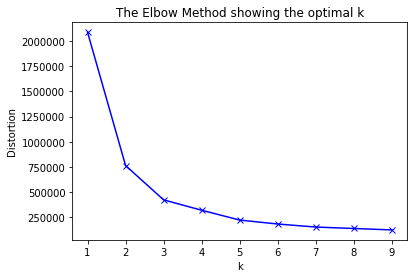

In [31]:
#clustering part how to find K value  

distortions = []

for i in  range(1,10):
    kmeanModel = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeanModel.fit(X)
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(kmeanModel.inertia_)

plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [32]:
# why ???


In [54]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y=kmeans.fit_predict(X)
kmeansoutput=kmeans.fit(X)

print(y.shape)
y = np.reshape(y,(111,1))
print(X.shape)
kmeansoutput

(111,)
(111, 8)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

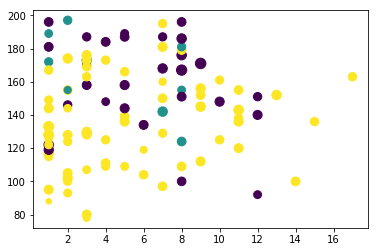

In [59]:
pl.scatter(X[:,0],X[:,1],X[:,2], c=kmeansoutput.labels_)
